In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original 3-bit image
image1 = np.array([[0, 1, 1],
                  [1, 2, 0],
                  [1, 0, 2]])

# Calculate histogram
hist, _ = np.histogram(image1.flatten(), bins=[0, 1, 2, 3], density=False)

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize CDF using maximum value for a 3-bit image
max_value = 7
normalized_cdf = np.round((cdf / cdf[-1]) * max_value).astype(int)

# Map the original pixel values to new values
equalized_image = normalized_cdf[image1]

# Plot original and equalized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image1, cmap='gray', vmin=0, vmax=2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
plt.axis('off')

plt.show()


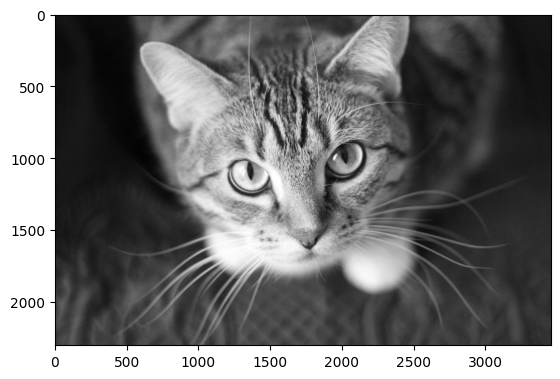

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('pexels-kmerriman-20787.jpg', cv2.IMREAD_GRAYSCALE)
#show the image
plt.imshow(image, cmap='gray')


In [ ]:
#check data type and maximum value
image.dtype
image.max()

In [ ]:
#plot historgram
f = np.zeros(256)
for i in range(256):
    f[i] = np.sum(image == i)
plt.bar(np.arange(256), f)

In [ ]:
cf = np.cumsum(f)
print(len(cf))
plt.plot(np.arange(256), cf)

In [ ]:
np.prod(image.shape)

In [ ]:
cf

In [ ]:
cf /= np.prod(image.shape)
plt.plot(np.arange(256), cf)

In [ ]:
mapping = np.round(cf * 255)
mapping = mapping.astype(np.uint8)
mapping


In [9]:
B = image.copy()
for i in range(256):
  B[image==i] = mapping[i]

In [ ]:
plt.subplot(1,2,1); plt.imshow(image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(B, cmap='gray')

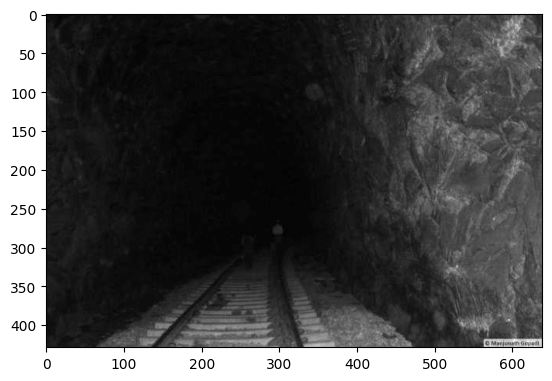

In [4]:
# Load the image in grayscale
T = cv2.imread('tunnel.jpg', cv2.IMREAD_GRAYSCALE)
#show the image
plt.imshow(T, cmap='gray')

In [1]:
def histeq(input):
  f = np.zeros(256)
  for i in range(0, 256):
    f[i] = np.sum(input == i)
  cf = np.cumsum(f)
  cf /= np.prod(input.shape)
  mapping = np.round(cf * 255).astype(np.uint8)
  output = input.copy()
  for i in range(256):
    output[input==i] = mapping[i]
  return output


In [2]:
B = T.copy()
kernel = 11
stride = 1
k = kernel//2
for i in range(0, T.shape[0], stride):
  for j in range(0, T.shape[1], stride):
    temp = T[i: i + kernel, j: j + kernel]
    if np.prod(temp.shape) == kernel ** 2:
      B[i+k, j+k] = histeq(temp)[k, k]

NameError: name 'T' is not defined

In [ ]:
plt.imshow(B, cmap='gray')

Averaging

In [ ]:
B = T.copy()
kernel = 21
stride = 1
k = kernel//2
for i in range(0, T.shape[0], stride):
  for j in range(0, T.shape[1], stride):
    temp = A[i: i + kernel, j: j + kernel]
    if np.prod(temp.shape) == kernel ** 2:
      B[i+k, j+k] = temp.mean().astype(np.uint8)

In [ ]:
plt.imshow(B, cmap='gray')